# Вебинар 3. Визуализация и анализ данных.

**EDA** - Exploratory Data Analysis

_Kaggle House Prices: Advanced Regression Techniques competition:_

- Short EDA [beginner's tutorial](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
- Extended EDA [master's tutorial](https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis) 

**Зачем это?**
- Понимание, как устроены данные
- Проверка фичей на адекватность
- _Генерация новых фич_ - наибольший вклад в качество прогноза

**3 шага EDA в Data Science**
1. Распределение таргета
2. Распределение фичей
3. Графики влияния фичей на таргет

**Подключение библиотек и скриптов**

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [4]:
matplotlib.rcParams.update({'font.size': 14})  # размер шрифта на графиках

**Пути к директориям и файлам**

In [5]:
DATASET_PATH = 'housing.csv'
PREPARED_DATASET_PATH = 'housing_prepared.csv'
CALIFORNIA_MAP_PATH = 'California_Map.png'

### Загрузка данных

**Описание датасета**

Статистические данные о ряде домов в Калифорнии, основанные на переписи 1990 года.

* **longitude** - долгота
* **latitude** - широта
* **housing_median_age** - средний возраст дома
* **total_rooms** - общее количество комнат
* **total_bedrooms** - общее количество спален
* **population** - количество проживающих
* **households** - домохозяйства
* **ocean_proximity** - близость океана
* **median_income** - средний доход
* **median_house_value** - средняя стоимость дома

In [6]:
df = pd.read_csv(DATASET_PATH, sep=';')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,14.659091,0.365909,0,0,0,1,0,2083.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,15.579659,0.338217,0,0,0,1,0,2083.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,12.951602,0.338105,0,0,0,1,0,2083.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,18.445840,0.437991,0,0,0,1,0,2083.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,17.209588,0.347265,0,0,0,1,0,2083.0


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
bedroom_share          float64
population_per_room    float64
<1H OCEAN                int64
INLAND                   int64
ISLAND                   int64
NEAR BAY                 int64
NEAR OCEAN               int64
median_rooms           float64
dtype: object

### Уменьшение объема памяти, который занимает датасет**

https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

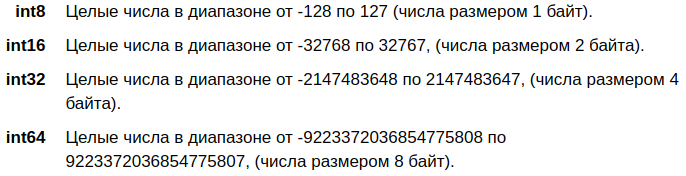

In [9]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [10]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 2.83 MB
Memory usage after optimization is: 0.63 MB
Decreased by 77.8%


In [11]:
df.dtypes

longitude               float16
latitude                float16
housing_median_age      float16
total_rooms             float16
total_bedrooms          float16
population              float16
households              float16
median_income           float16
median_house_value      float32
ocean_proximity        category
bedroom_share           float16
population_per_room     float16
<1H OCEAN                  int8
INLAND                     int8
ISLAND                     int8
NEAR BAY                   int8
NEAR OCEAN                 int8
median_rooms            float16
dtype: object

---

# 1. Распределение целевой переменной

- Помните про различие среднего арифметическое, медианы, моды
- Среднее арифметическое (мат ожидание) подходят для нормальных распределений = SUM / N
- Медиана (quantile 50%) - практически для любых распределений = Середина отранжированного ряда
- Мода - для категориальных переменных = наиболее часто встречающееся значение в выборке

[1, 2, 2, 3, 4, 6, 8]
median - 3.0
mean - 3.7142857142857144
mode - 2


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


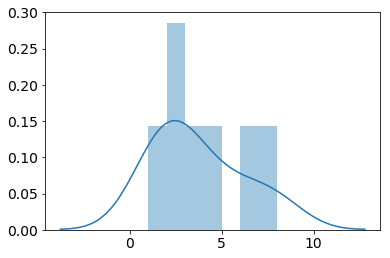

In [12]:
x = np.array([1, 4, 2, 6, 3, 8, 2])
print(sorted(x))
print(f'median - {np.quantile(x, q=0.5)}\nmean - {np.mean(x)}\nmode - {stats.mode(x)[0][0]}')
sns.distplot(x, bins=len(x))

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


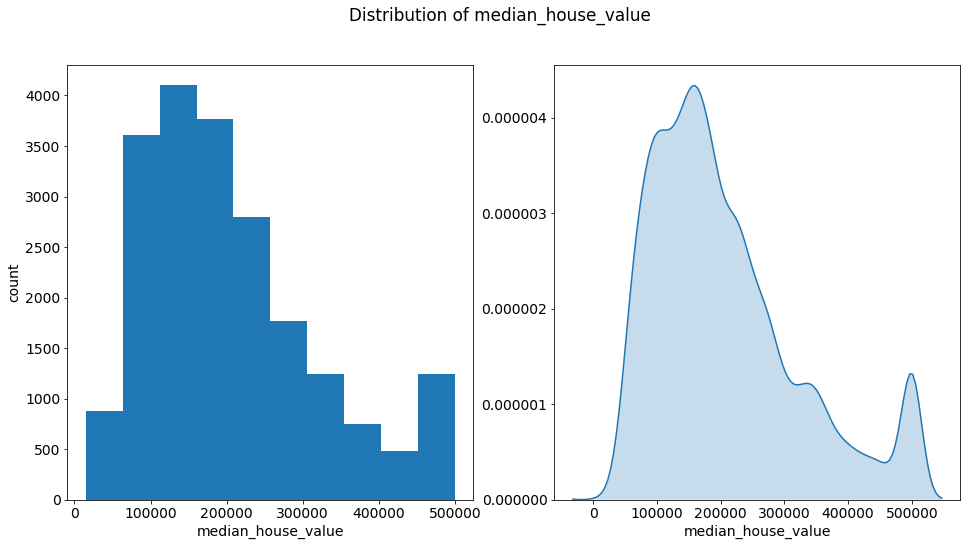

In [13]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
#df['median_house_value'].hist(density=True)
plt.hist(df['median_house_value'], density=False)
plt.ylabel('count')
plt.xlabel('median_house_value')

plt.subplot(122)
sns.kdeplot(df['median_house_value'], shade=True, legend=False)
plt.xlabel('median_house_value')

plt.suptitle('Distribution of median_house_value')
plt.show()

In [14]:
target_mean = round(df['median_house_value'].mean(), 2)
target_median = df['median_house_value'].median()
target_mode = df['median_house_value'].mode()[0]
print(target_mean, target_median, target_mode)

206855.0 179700.0 500001.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


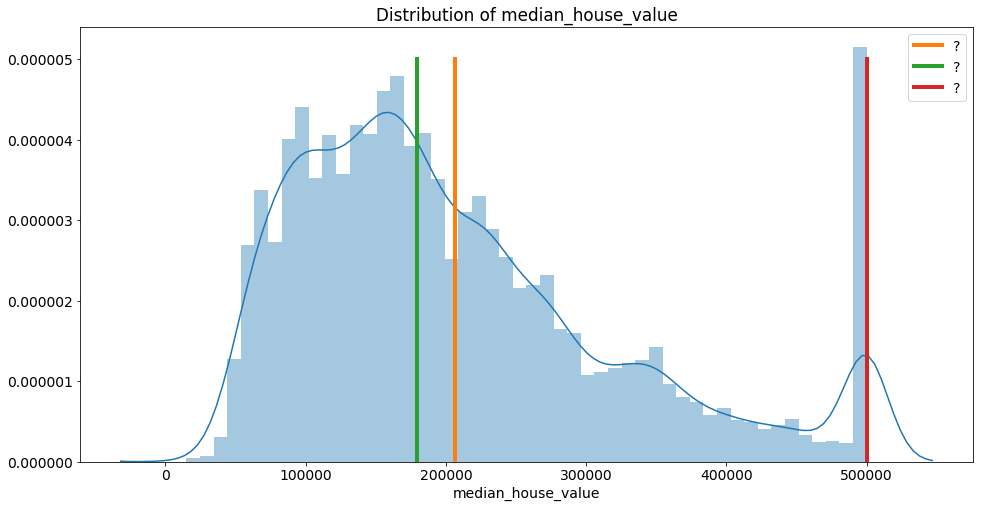

In [15]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='?',  linewidth=4)
plt.plot([target_median] * 10, y, label='?',  linewidth=4)
plt.plot([target_mode] * 10, y, label='?', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

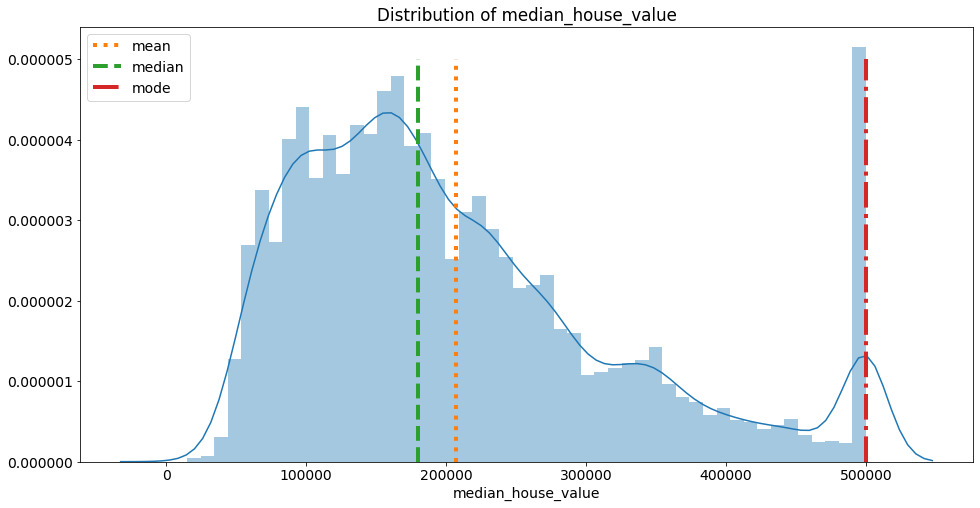

In [13]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

In [17]:
df['median_house_value'].to_csv('beforeCat')

In [29]:
df['median_house_value'].describe()

count     20640.00
mean     206855.00
std      115395.25
min       14999.00
25%      119600.00
50%      179700.00
75%      264725.00
max      500001.00
Name: median_house_value, dtype: float64

In [30]:
target_bins = df['median_house_value'] // 10000 * 10000
# 0 - 10000 --> 0
# 10001 - 20000 --> 1
# ...

target_adjusted_mode = target_bins.mode()[0]

target_adjusted_mode

160000.0

In [31]:
(target_bins.value_counts()).size

50

In [32]:
df['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
5        269700.0
6        299200.0
7        241400.0
8        226700.0
9        261100.0
10       281500.0
11       241800.0
12       213500.0
13       191300.0
14       159200.0
15       140000.0
16       152500.0
17       155500.0
18       158700.0
19       162900.0
20       147500.0
21       159800.0
22       113900.0
23        99700.0
24       132600.0
25       107500.0
26        93800.0
27       105500.0
28       108900.0
29       132000.0
           ...   
20610    243800.0
20611    175000.0
20612    207700.0
20613    196600.0
20614    280000.0
20615    223900.0
20616    194300.0
20617    169300.0
20618    189300.0
20619    186800.0
20620    213200.0
20621    500001.0
20622    182000.0
20623    194100.0
20624    275000.0
20625    125000.0
20626     52500.0
20627    275000.0
20628    337500.0
20629    233200.0
20630    500001.0
20631    321800.0
20632    428600.0
20633    357600.0
20634    3

In [33]:
target_bins

0        450000.0
1        350000.0
2        350000.0
3        340000.0
4        340000.0
5        260000.0
6        290000.0
7        240000.0
8        220000.0
9        260000.0
10       280000.0
11       240000.0
12       210000.0
13       190000.0
14       150000.0
15       140000.0
16       150000.0
17       150000.0
18       150000.0
19       160000.0
20       140000.0
21       150000.0
22       110000.0
23        90000.0
24       130000.0
25       100000.0
26        90000.0
27       100000.0
28       100000.0
29       130000.0
           ...   
20610    240000.0
20611    170000.0
20612    200000.0
20613    190000.0
20614    280000.0
20615    220000.0
20616    190000.0
20617    160000.0
20618    180000.0
20619    180000.0
20620    210000.0
20621    500000.0
20622    180000.0
20623    190000.0
20624    270000.0
20625    120000.0
20626     50000.0
20627    270000.0
20628    330000.0
20629    230000.0
20630    500000.0
20631    320000.0
20632    420000.0
20633    350000.0
20634    3

In [34]:
len(np.unique(target_bins))

50

In [35]:
np.unique(target_bins)

array([ 10000.,  20000.,  30000.,  40000.,  50000.,  60000.,  70000.,
        80000.,  90000., 100000., 110000., 120000., 130000., 140000.,
       150000., 160000., 170000., 180000., 190000., 200000., 210000.,
       220000., 230000., 240000., 250000., 260000., 270000., 280000.,
       290000., 300000., 310000., 320000., 330000., 340000., 350000.,
       360000., 370000., 380000., 390000., 400000., 410000., 420000.,
       430000., 440000., 450000., 460000., 470000., 480000., 490000.,
       500000.], dtype=float32)

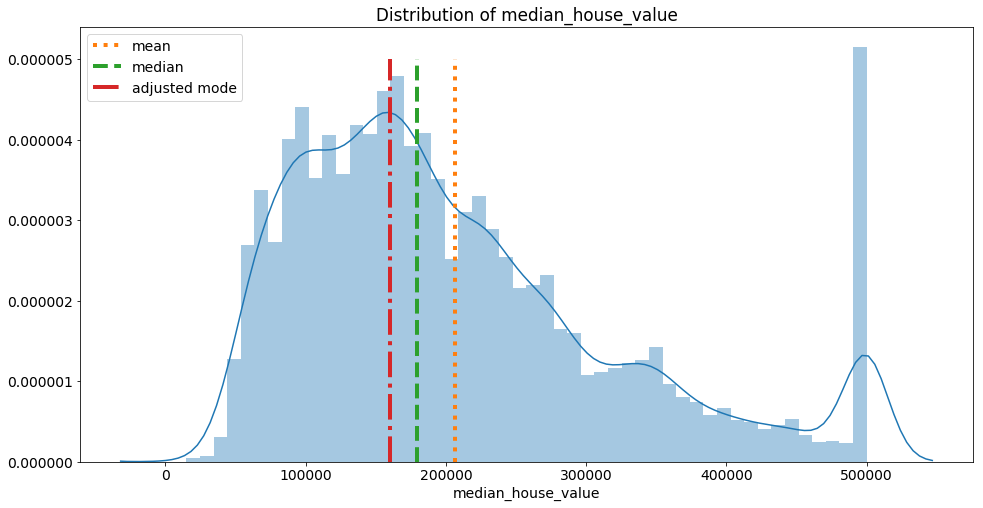

In [36]:
plt.figure(figsize = (16, 8))

sns.distplot(df['median_house_value'], bins=50) 

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_adjusted_mode] * 10, y, label='adjusted mode', linestyle='-.', linewidth=4)

plt.title('Distribution of median_house_value')
plt.legend()
plt.show()

# 2. Анализ признаков

### 2.1 Количественные признаки

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])
df_num_features.drop('median_house_value', axis=1, inplace=True)

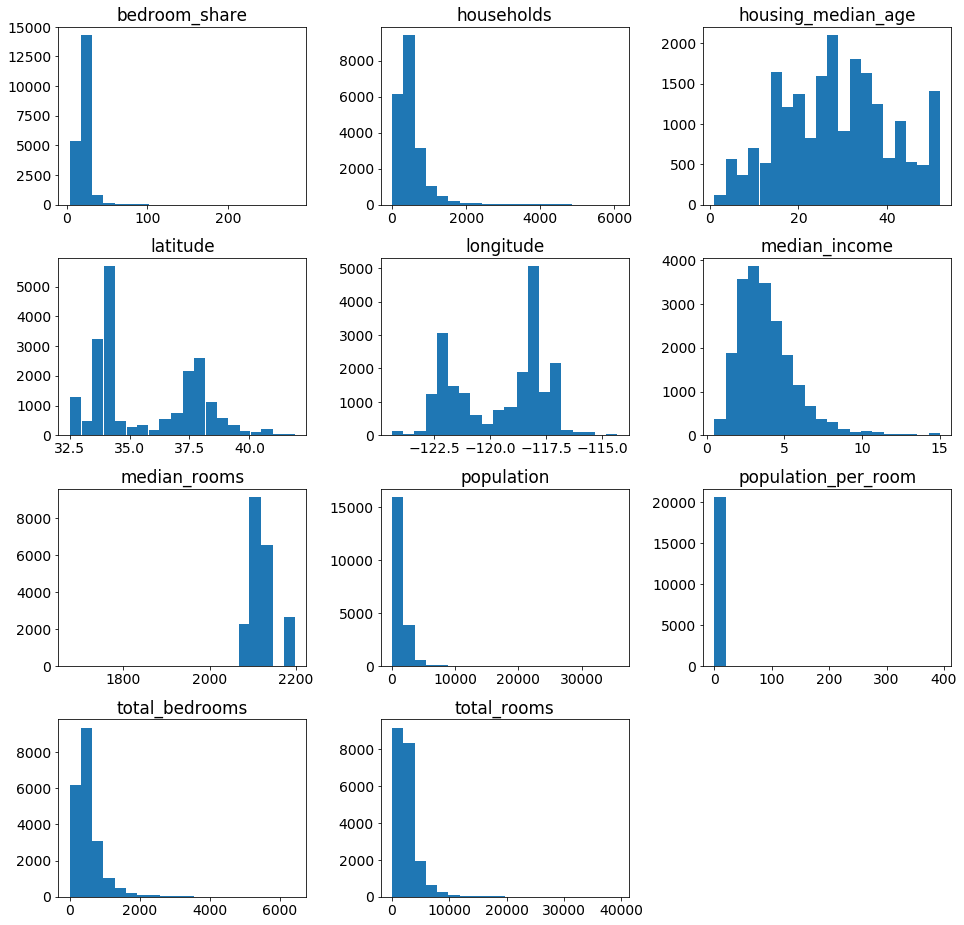

In [39]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

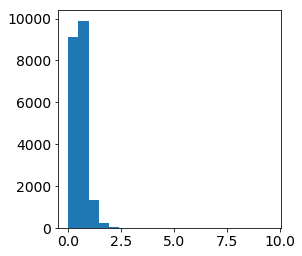

In [40]:
df_num_features.loc[df_num_features['population_per_room'] < 10, 'population_per_room'].\
    hist(figsize=(4,4), bins=20, grid=False);

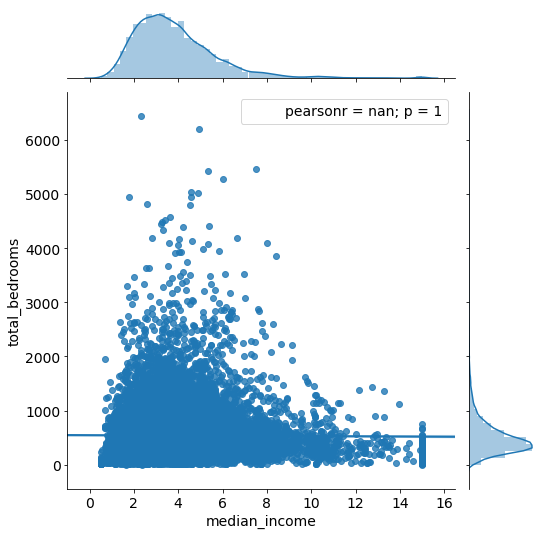

In [47]:
grid = sns.jointplot(df['median_income'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

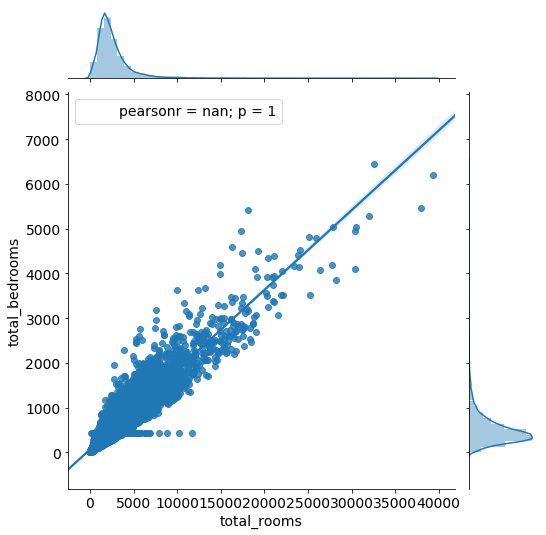

In [48]:
grid = sns.jointplot(df['total_rooms'], df['total_bedrooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [26]:
df['total_bedrooms'].median()

435.0

In [27]:
df[df['total_bedrooms'] == 435].shape[0] * 100 / df.shape[0]

1.182170542635659

In [28]:
df.shape[0]

20640

In [29]:
df[df['total_bedrooms'] == df['total_bedrooms'].median()].shape[0]

244

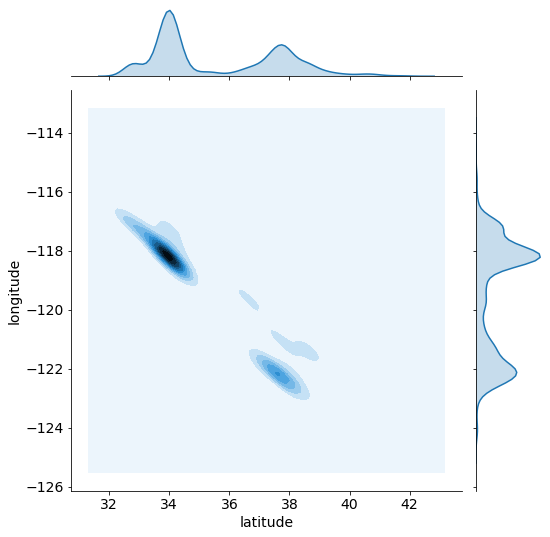

In [30]:
grid = sns.jointplot(df['latitude'], df['longitude'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [31]:
df['city'] = (df['longitude'] > -120) * 1

In [32]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,city
0,-122.25,37.87500,41.0,880.0,129.0,322.0,126.0,8.328125,452600.0,NEAR BAY,14.656250,0.365967,0,0,0,1,0,2084.0,0
1,-122.25,37.87500,21.0,7100.0,1106.0,2400.0,1138.0,8.304688,358500.0,NEAR BAY,15.578125,0.338135,0,0,0,1,0,2084.0,0
2,-122.25,37.84375,52.0,1467.0,190.0,496.0,177.0,7.257812,352100.0,NEAR BAY,12.953125,0.338135,0,0,0,1,0,2084.0,0
3,-122.25,37.84375,52.0,1274.0,235.0,558.0,219.0,5.644531,341300.0,NEAR BAY,18.453125,0.437988,0,0,0,1,0,2084.0,0
4,-122.25,37.84375,52.0,1627.0,280.0,565.0,259.0,3.845703,342200.0,NEAR BAY,17.203125,0.347168,0,0,0,1,0,2084.0,0


### 2.2 Категориальные признаки

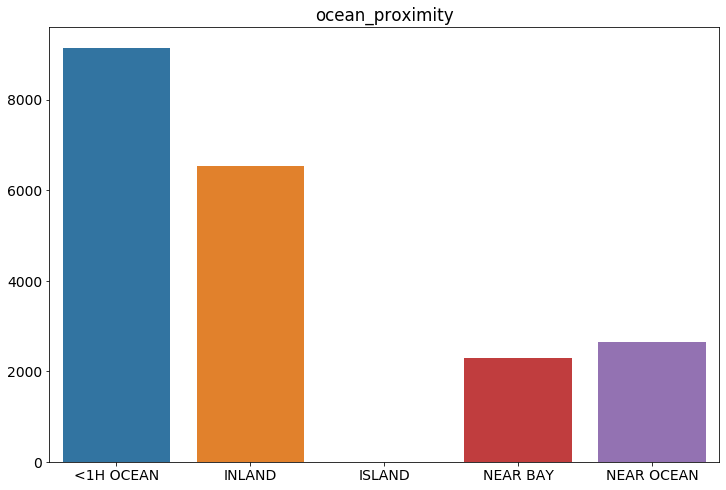

In [33]:
counts = df['ocean_proximity'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('ocean_proximity')
sns.barplot(counts.index, counts.values)
    
plt.show()

### 2.3 Бинарные признаки

In [34]:
df_bin_features = df.select_dtypes(include='int64')

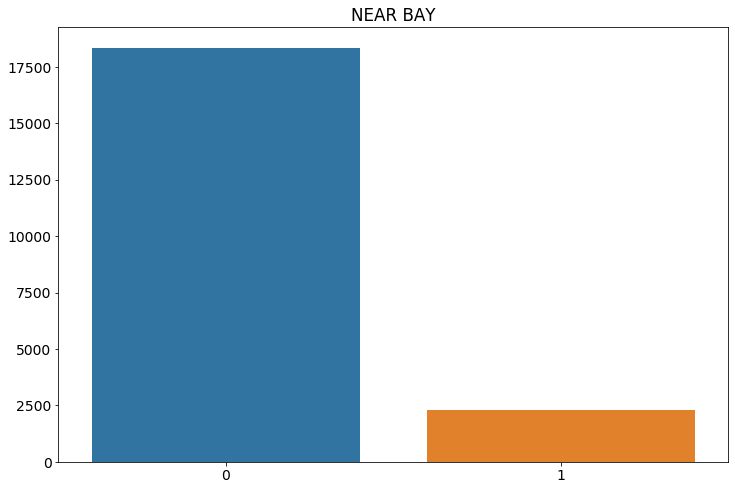

In [35]:
counts = df['NEAR BAY'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('NEAR BAY')
sns.barplot(counts.index, counts.values)
    
plt.show()

### 2.4 Матрица корреляций

- Показывает линейную связь между переменными
- Изменяется от -1 до 1
- Коррелиция - мера только __линейной__ связи

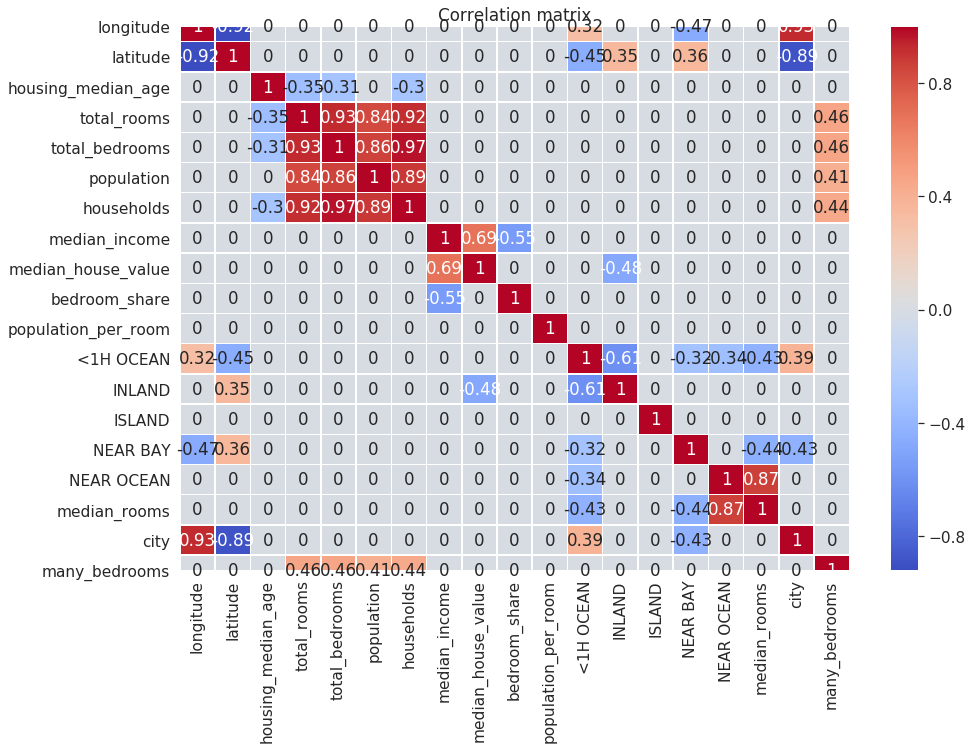

In [45]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

# 3. Анализ зависимости таргета от фичей

## 3.1 Количественные признаки

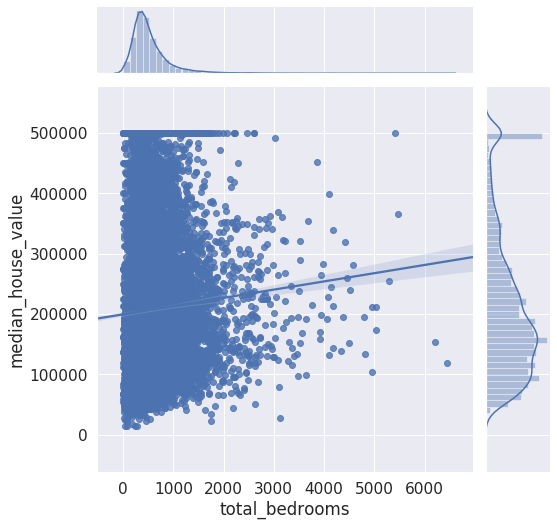

In [37]:
grid = sns.jointplot(df['total_bedrooms'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [38]:
df['many_bedrooms'] = (df['total_bedrooms'] > 3000) * 1

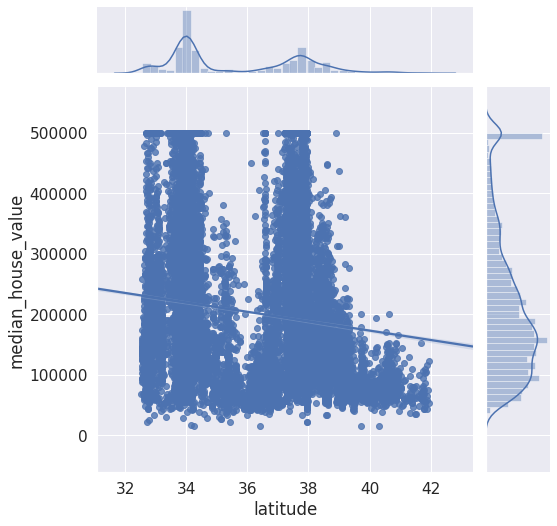

In [39]:
grid = sns.jointplot(df['latitude'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

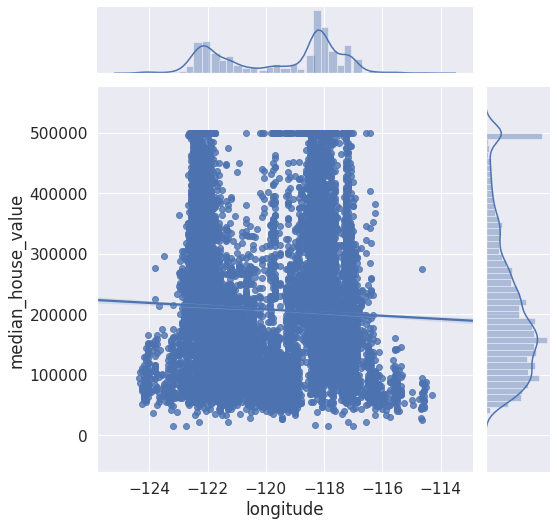

In [40]:
grid = sns.jointplot(df['longitude'], df['median_house_value'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

## 3.2 Категориальные / бинарные признаки

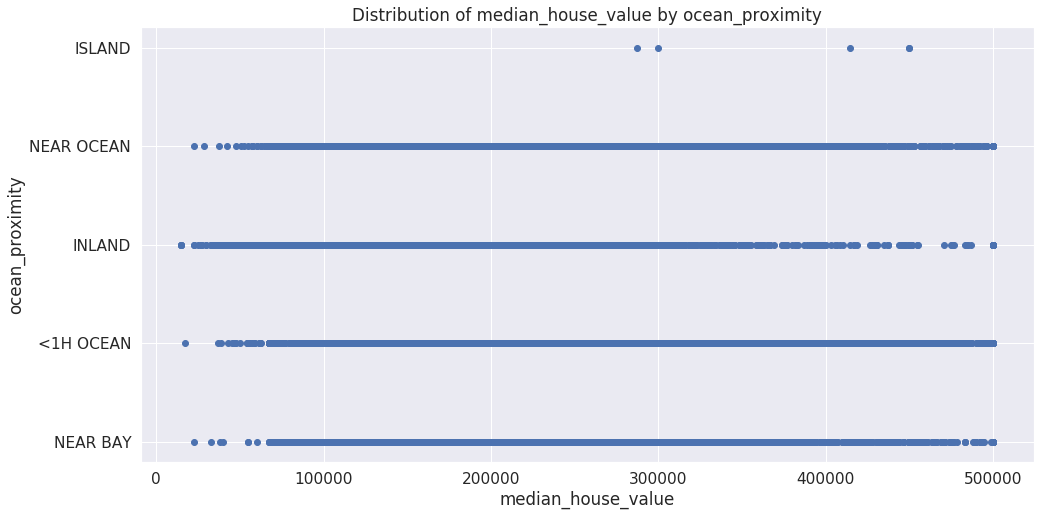

In [41]:
plt.figure(figsize=(16, 8))

plt.scatter(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

### box plot

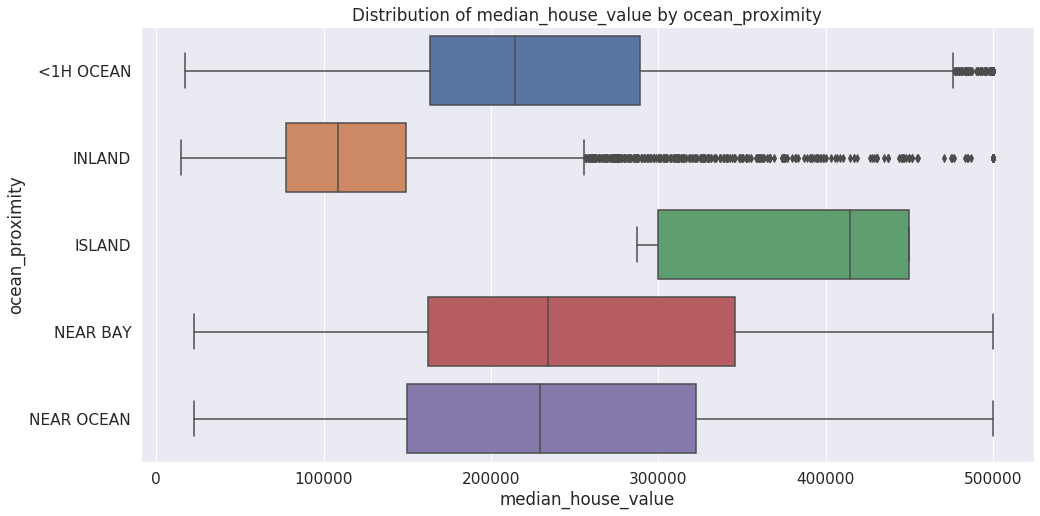

In [42]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

In [43]:
df[df['INLAND'] == 1].describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedroom_share,population_per_room,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_rooms,city,many_bedrooms
count,6542.000000,6542.000000,6542.000000,6542.0,6542.0,6542.00,6542.00,6542.000000,6542.00000,6542.000000,6542.000000,6542.0,6542.0,6542.0,6542.0,6542.0,6542.0,6542.000000,6542.000000
mean,-inf,inf,inf,inf,inf,inf,inf,3.207031,124792.71875,inf,0.645996,0.0,1.0,0.0,0.0,0.0,inf,0.496179,0.003669
std,1.901367,2.113281,11.796875,inf,inf,inf,inf,1.438477,70019.75000,inf,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.500024,0.060462
min,-123.750000,32.625000,1.000000,2.0,2.0,5.00,2.00,0.500000,14999.00000,5.500000,0.018112,0.0,1.0,0.0,0.0,0.0,2130.0,0.000000,0.000000
25%,-121.375000,34.187500,16.000000,1404.0,283.0,728.25,254.00,2.187988,77500.00000,17.687500,0.433105,0.0,1.0,0.0,0.0,0.0,2130.0,0.000000,0.000000
50%,-120.000000,36.968750,24.000000,2130.0,426.0,1145.00,385.00,2.988281,108500.00000,19.828125,0.507324,0.0,1.0,0.0,0.0,0.0,2130.0,0.000000,0.000000
75%,-117.812500,38.562500,33.000000,3216.0,633.0,1664.75,577.75,3.966797,148975.00000,22.406250,0.611816,0.0,1.0,0.0,0.0,0.0,2130.0,1.000000,0.000000
max,-114.312500,41.937500,52.000000,39328.0,6208.0,16304.00,5360.00,15.000000,500001.00000,282.500000,392.750000,0.0,1.0,0.0,0.0,0.0,2130.0,1.000000,1.000000


**Как строится box plot**  

[Подробное объяснение](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы"

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25), 
- ...

*Интерквартильный размах = q75 - q25

### Violin plot

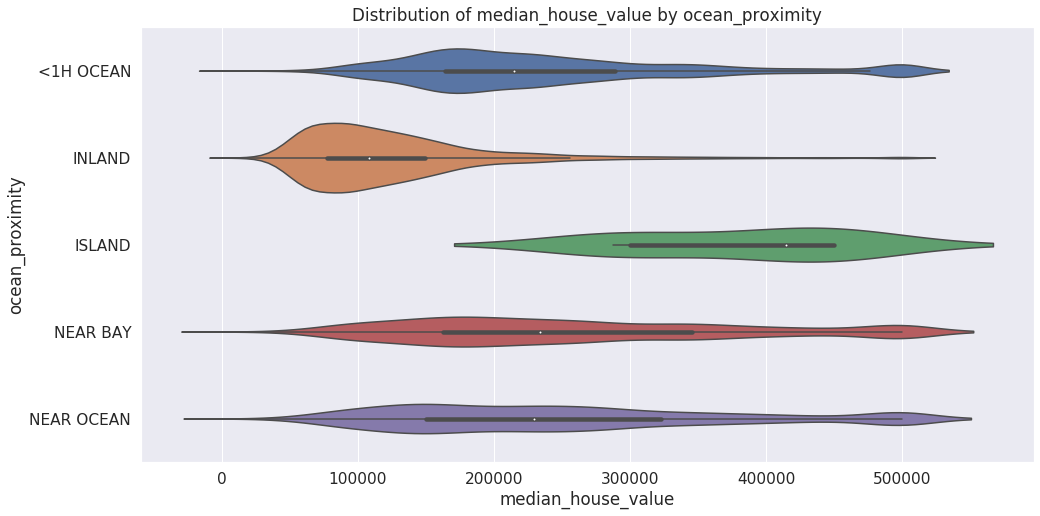

In [44]:
plt.figure(figsize=(16, 8))

sns.violinplot(df['median_house_value'], df['ocean_proximity'])

plt.xlabel('median_house_value')
plt.ylabel('ocean_proximity')
plt.title('Distribution of median_house_value by ocean_proximity')
plt.show()

## 3.3 Гео данные*

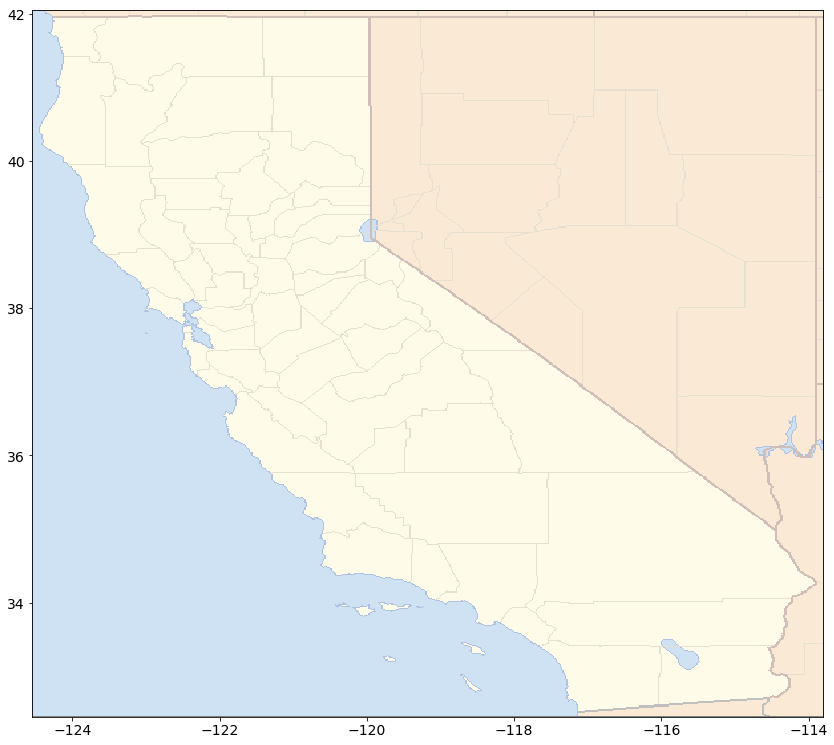

In [49]:
california_map = img.imread(CALIFORNIA_MAP_PATH)

plt.figure(figsize=(20,13))
plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.show()

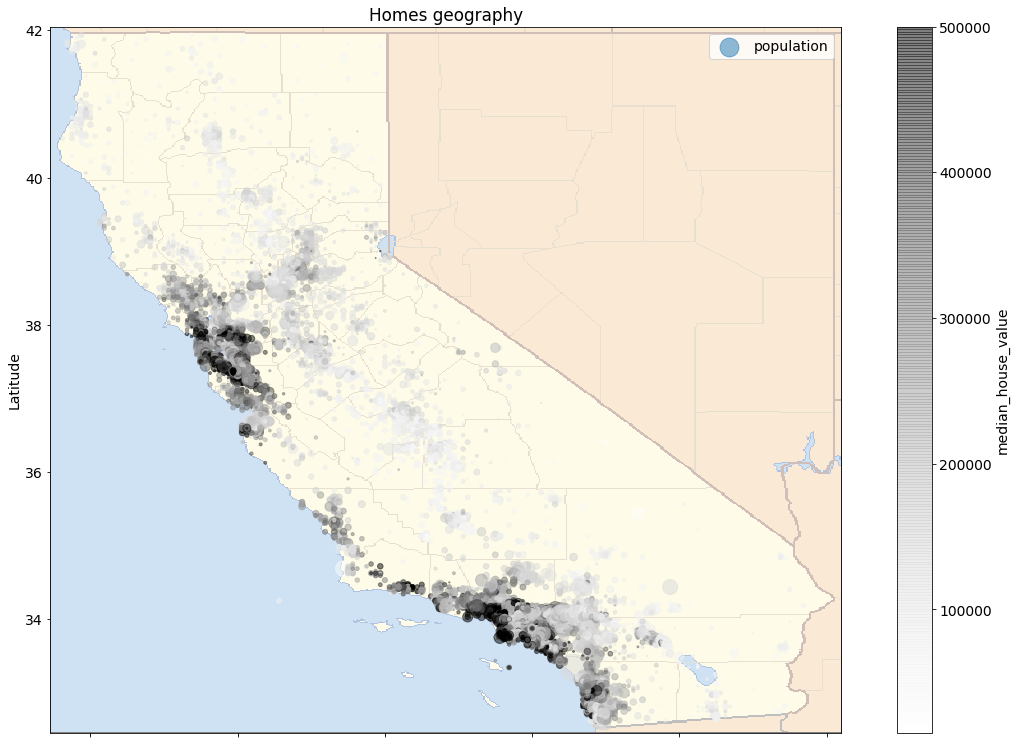

In [50]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, 
        s=df['population'] / 50, label='population', c='median_house_value', 
        cmap=plt.get_cmap('jet'), figsize=(20,13))

plt.imshow(california_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Homes geography")
plt.legend() 
plt.show()

## Kepler**

In [51]:
!conda install -c conda-forge keplergl

Fetching package metadata ...............



PackageNotFoundError: Packages missing in current channels:
            
  - keplergl

We have searched for the packages in the following channels:
            
  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.continuum.io/pkgs/main/win-64
  - https://repo.continuum.io/pkgs/main/noarch
  - https://repo.continuum.io/pkgs/free/win-64
  - https://repo.continuum.io/pkgs/free/noarch
  - https://repo.continuum.io/pkgs/r/win-64
  - https://repo.continuum.io/pkgs/r/noarch
  - https://repo.continuum.io/pkgs/pro/win-64
  - https://repo.continuum.io/pkgs/pro/noarch
  - https://repo.continuum.io/pkgs/msys2/win-64
  - https://repo.continuum.io/pkgs/msys2/noarch
            



In [52]:
# !pip install keplergl==0.1.1
from keplergl import KeplerGl 

map_ = KeplerGl(height=700)
map_.add_data(df, 'Data')
map_.save_to_html(file_name='./california.html')

ModuleNotFoundError: No module named 'keplergl'

### Target encoding**

In [ ]:
df[['latitude', 'longitude', 'median_house_value']].head()

In [ ]:
df['latitude'] = np.round(df['latitude'], 0)
df['longitude'] = np.round(df['longitude'], 0)
df[['latitude', 'longitude', 'median_house_value']].head()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['latitude'], df['longitude'])
plt.show()

In [ ]:
df[['latitude', 'longitude']].drop_duplicates().shape[0]

In [ ]:
df_g = df.groupby(['latitude', 'longitude'])['median_house_value'].mean().reset_index()
df_g.head()